In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None


In [2]:
#create data frame

data=pd.read_csv('C:/Users/a/Downloads/archive/data.csv',encoding='unicode_escape')

### Display first five  rows

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Display last four rows

In [4]:
data.tail(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


### Gentare a Sample random row

In [5]:
data.sample

<bound method NDFrame.sample of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

### Display the Dimensions of the dataframe

In [6]:
data.shape

(541909, 8)

### Basic info about the dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Descriptive Statistics(numerical values) of the DataFrame

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

- the dtype of incoice should be changed from object to DateTime
- change the CustomerID dtype from float to int


### Convert InvoiceDate into datetime datatype

In [10]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
#type cast column 'CoustumerID'
data=data.astype({'CustomerID':int})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'CustomerID'

### Check for missing value

- to overcome the error
- IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'CustomerID'
- For that, we use the null method, and the syntax is data.isnull() it will return the bullion value as false or true if we want to find out how many null vaue present in every column, so use the .sum method data.isnull.sum() 

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

In [ ]:
#fill missing value in the Description columns as "unknown"
data['Description']=data['Description'].fillna('unknown')

In [ ]:
data[data['UnitPrice']<0]

In [ ]:
# Drop rows with missing value in the CustomerID to int data type
data=data.dropna(subset=['CustomerID'])

In [ ]:
data.isnull().sum()

# Error Solve

### Find the number of duplicaterows in Dataframe

In [ ]:
data.duplicated().sum()

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

# Add new column 

### to calculate total sales for each invoice

In [23]:
data['TotalSales']=data['Quantity']*data['UnitPrice']

In [24]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,2010,22.00


In [ ]:
data.columns

### find the maximum< minimum and average of TotalSales

In [ ]:
data['TotalSales'].max()

In [ ]:
data['TotalSales'].min()

In [ ]:
data['UnitPrice'].max()

In [ ]:
data['UnitPrice'].min()

In [ ]:
data['Quantity'].min()

### Remove the nagitive quantity purchase from the data frame

In [ ]:
data[data['Quantity']<0]

In [ ]:
data=data[data['Quantity']>0]

In [ ]:
#check min to confirm for positive quantity
data['Quantity'].min()

In [ ]:
data.shape

In [ ]:
data.describe()

### Display all the uniqe value 

In [ ]:
data.Country.unique()

## Display total no of unique values in each column it can be applied on a single column as well as on the whole dataframe.

In [ ]:
data.Country.nunique()

In [ ]:
# check the  unique values in all columns
data.nunique()


## Display all unique values with their count  in column

In [ ]:
data.Country.value_counts()

In [ ]:
data.Country.value_counts()[data.Country.value_counts()>1000]

## View the purchase made by country japan

In [ ]:
data.loc[data.Country=='Japan']

In [ ]:
#view profuct discription quantity and totalsales of purchase made from japan

data.loc[data.Country=='Japan',['Description','Quantity','TotalSales']]

## Select purchase of product party Bunting where quantity > 100

In [ ]:
data.loc[(data.Description=='PARTY BUNTING')&(data.Quantity>100),'Description':]

### Get all records of the product watrbottel

In [ ]:
data[data.Description.str.contains("WATER BOTTLE")]

## SOLVE THE ERROR

### "The error occurred due to the presence of NaN values in the column, which was resolved by adding na=False to the str.contains() method."

In [ ]:
data[data.Description.str.contains('WATER BOTTLE', na=False)]

## Split  the  data into Groups
### Find the country  with the unique number of costumers`

In [ ]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

## find the sum of sales by country

In [ ]:
# group data by country and calculate total sales of each Country

sales_c=data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
sales_c.head(10)


In [ ]:
#visuvalize the sales by country

top_sales=sales_c[:10]
top_sales.plot.bar(figsize=(12,6))
plt.show()

## Average sales by country


In [ ]:
avg_sales=data.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
avg_sales.tail(10)

## Average sales by uk

In [ ]:
a_uk=data.Country=='United Kingdom'
data.loc[a_uk,'TotalSales'].mean()

## find the total amount spent by each customer

In [ ]:
cust=data.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
cust

In [ ]:
# Display top 10 coustumer spending
top_10 = cust.iloc[:10]
top_10

## Visualize to 10 customer

In [ ]:
top_10.plot(kind='bar', figsize=(10, 5), title='Top 10 Customers by Total Sales')

## Find out the top 10 customer who have order bulk quantity

In [ ]:
bulk=data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
bulk

In [ ]:
bulk.plot(kind='bar',color='green', figsize=(10, 5), title='Customer who have order bulk quantity')

In [ ]:
data.head()

## Most purcahase product

In [ ]:
most_p=data.groupby(['CustomerID','Description'])['Quantity'].sum().sort_values(ascending=False)
most_p.head(10)

In [ ]:
most_p.reset_index()

## Most populer Product

In [ ]:
most_populear=data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [ ]:
most_populear.head(10)

In [ ]:
data.loc[data.Description=='RABBIT NIGHT LIGHT','Quantity'].sum()

## Retrive the year and month from invoice date

In [19]:
data['Year']=data['InvoiceDate'].dt.year

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010


In [21]:
data['Year'].value_counts()

Year
2011    499428
2010     42481
Name: count, dtype: int64

In [17]:
data['Month']=data['InvoiceDate'].dt.month_name()

In [15]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month'],
      dtype='object')

In [25]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,December,2010,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,December,2010,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,December,2010,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,December,2010,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,December,2010,54.08


## Calculate Sales per year

In [35]:
sales_year = data.groupby(['Month', 'Year'])['TotalSales'].sum().reset_index()
sales_year

,Month,Year,TotalSales
0,April,2011,493207.121
1,August,2011,682680.510
2,December,2010,748957.020
3,December,2011,433668.010
4,February,2011,498062.650
5,January,2011,560000.260
6,July,2011,681300.111
7,June,2011,691123.120
8,March,2011,683267.080
9,May,2011,723333.510


In [37]:
sales_2010 = data[data['Year']==2010].groupby(['Month', 'Year'])['TotalSales'].sum().reset_index()
sales_2010

,Month,Year,TotalSales
0,December,2010,748957.02


In [39]:
sales_2011 = data[data['Year']==2011].groupby(['Month', 'Year'])['TotalSales'].sum().reset_index()
sales_2011

,Month,Year,TotalSales
0,April,2011,493207.121
1,August,2011,682680.510
2,December,2011,433668.010
3,February,2011,498062.650
4,January,2011,560000.260
5,July,2011,681300.111
6,June,2011,691123.120
7,March,2011,683267.080
8,May,2011,723333.510
9,November,2011,1461756.250


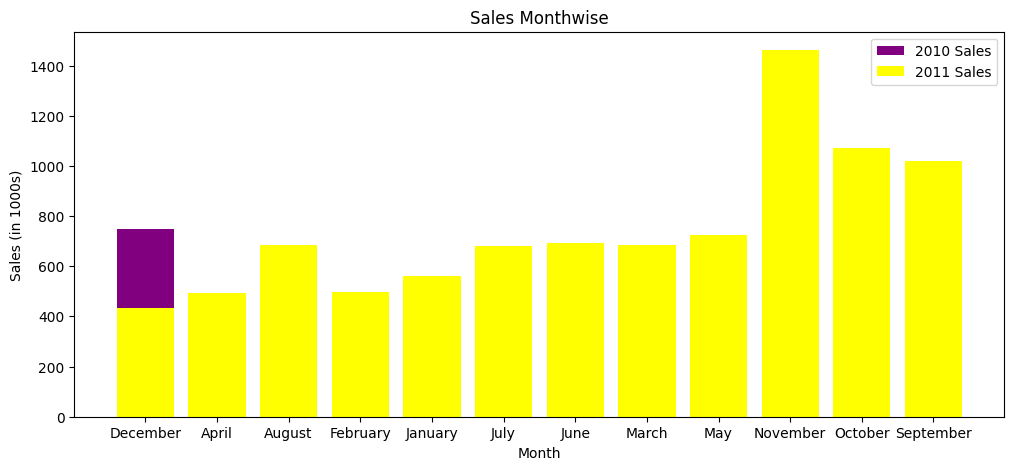

In [43]:
# visualize sales per year
plt.figure(figsize=(12, 5))

plt.bar(sales_2010['Month'],sales_2010['TotalSales']/1000,label='2010 Sales', color='purple')
plt.bar(sales_2011['Month'],sales_2011['TotalSales']/1000,label='2011 Sales', color='yellow')

plt.legend()
plt.title('Sales Monthwise')
plt.xlabel('Month')
plt.ylabel('Sales (in 1000s)')
plt.show()

#                                      End